# STAT 301 Group Final Report - Data Science Salary

By: Jessie Sheng, Junyao Wang, Nathan Shack, Poemm Gupta

In [1]:
# libraries needed in this analysis
install.packages("countrycode")
install.packages("stargazer")

library(countrycode)
library(MASS)
library(tidyverse)
library(repr)
library(broom)
library(GGally)
library(car)
library(leaps)
library(latex2exp)
library(tidymodels)
library(gridExtra)
library(faraway)
library(mltools)
library(glmnet)
library(cowplot)
library(modelr)
library(stargazer)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some



# 1. Introduction

Salaries in general are influenced by various factors such as economic conditions, experience level, job title, location, and company size. For instance, during economic booms, companies often offer competitive salaries to attract and retain top talent, whereas in recessions, salary growth may stagnate. 

In this report, we will be exploring a data science salary dataset to answer the **inference** question:

> Which attributes of a data science job and/or employee best predicts the data scientist's salary in USD?

The dataset used in this study focuses on salaries in the data science field, consisting of 11 variables and 607 observations. It provides detailed information on factors which are more likely to influene salaries including experience level, job title, location and company size. The experience level of a worker also matters because the more experienced, the more expertise they have in their jobs and possibly received more raises throughout thir career. The type of job also matters; a more higher level executive is likely to make more than a junior employee. Different locations also have different economies which directly affects how well businesses pay their employees. Company size is significant as well because bigger companies may engage in bigger projects that have bigger rewards as opposed to a smaller company.  All salary figures are standardized in U.S. dollars under the `salary_in_usd` column which will enable us to do direct comparison.

A study by Li et al.(2022) on printing-related job salaries serves as a valuable reference for our project. Inspired by their approach, our study will employ linear regression techniques, including forward and backward selection, to help identify which variables have the most significant impact on salaries in the data science field.

# 2. Methods and Results

## Exploratory Data Analysis (EDA)

### Data Science Job Salaries Dataset Description:

The "Data Science Job Salaries" dataset shows various features that may potentially influence how much `salary` a job in data science makes. Some of the features include:

| Feature | Description | Number of Observations | Most Common Population Breakdown | Number of Variables | Name of Variables | Type |
| --- | --- | --- | --- | --- | --- | --- |
`work_year` | The year the salary was paid. |  607 | 72x `2020`, 217x `2021`, 318x `2022`)| 3 |`2020`, `2021`, `2022` | Integer |
`experience_level` | The experience level in the job that they are doing | 607  | 46% `SE`, 35% `MI`, 19% `EN` + `EX` | 4 |`EN` (Entry Level), `MI` (Junior/Mid-level), `SE` (Intermediate/Senior-level), `EX` Executive-level/Director | String |
`employment_type` | The type of employment for the role | 607 | 97% `FT`, 2% `PT`, 1% `CT` + `FL` | 4 | `PT` (Part-time), `FT` (Full-time), `CT` (Contract), `FL` (Freelance) | String |
`job_title` | The role worked in during the year. | 607 | 24% `Data Scientist`, 22% `Data Engineer`, 55% of the other 48 variables | 50 | `Data Scientist`, `Machine Learning Scientist`, `Big Data Engineer`, `Product Data Analyst`, `Machine Learning Engineer`, `Data Analyst`, `Lead Data Scientist`, `Business Data Analyst`, `Lead Data Engineer`, `Data Science Consultant`, `BI Data Analyst`, `Director of Data Science`, `Research Scientist`, `Machine Learning Manager`, `Data Engineering Manager`, `Machine Learning Infrastructure Engineer`, `ML Engineer`, `AI Scientist`, `Computer Vision Engineer`, `Principal Data Scientist`, `Data Science Manager`, `Head of Data`, `3D Computer Vision Researcher`, `Data Analytics Engineer`, `Applied Data Scientist`, `Marketing Data Analyst`, `Cloud Data Engineer`, `Financial Data Analyst`, `Computer Vision Software Engineer`, `Director of Data Engineering`, `Principal Data Engineer`, `Machine Learning Developer`, `Applied Machine Learning Scientist`, `Data Analytics Manager`, `Head of Data Science`, `Data Specialist`, `Data Architect`, `Finance Data Analyst`, `Principal Data Analyst`, `Big Data Architect`, `Staff Data Scientist`, `Analytics Engineer`, `ETL Developer`, `Head of Machine Learning`, `NLP Engineer`, `Lead Machine Learning Engineer`, `Data Analytics Lead` | String|
`salary` | The total gross salary amount paid | 607 | Min: `4000`, 25%: `70.0k`, 50%: `115k`, 75%: `165k`, Max: `30.4m` | 0 |  | Integer |
`salary_currency` | The currency of the salary paid as an ISO 4217 currency code| 607 | 66%: `USD`, 16%: `EUR`, 19%: Other | 17 | `EUR`, `USD`, `GBP`, `HUF`, `INR`, `JPY`, `CNY`, `MXN`, `CAD`, `DKK`, `PLN`, `SGD`, `CLP`, `BRL`, `TRY`, `AUD`, `CHF` | String |
`salary_in_usd` | The salary in USD (FX rate divided by avg. USD rate for the respect year via fxdata.foorilla.com). | 607 |Min: `2859`, 25%: `62.7k`, 50%: `102k`, 75%: `150k`, Max: `600k` | 0 | | Integer | 
`employee_residence` | Employee's primary country of residence in during the work year as an ISO 3166 country code. | 607 | 55%: `US`, 7%: `GB`, 38%: Other | 57 | `DE`, `JP`, `GB`, `HN`, `US`, `HU`, `NZ`, `FR`, `IN`, `PK`, `PL`, `PT`, `CN`, `GR`, `AE`, `NL`, `MX`, `CA`, `AT`, `NG`, `PH`, `ES`, `DK`, `RU`, `IT`, `HR`, `BG`, `SG`, `BR`, `IQ`, `VN`, `BE`, `UA`, `MT`, `CL`, `RO`, `IR`, `CO`, `MD`, `KE`, `SI`, `HK`, `TR`, `RS`, `PR`, `LU`, `JE`, `CZ`, `AR`, `DZ`, `TN`, `MY`, `EE`, `AU`, `BO`, `IE`, `CH`| String |
`remote_ratio` | The overall amount of work done remotely. | 607 | 127x `0`, 99x `50`, 381x `100` | 3 | `0` (less than 20% remote work), `50` (between 20% and 80% remote) , `100` (more than 80% remote) | Integer|
`company_location` | The country of the employer's main office or contracting branch as an ISO 3166 country code | 607 | 58%: `US`, 8%: `GB`, 34%: Other | 50 | `DE`, `JP`, `GB`, `HN`, `US`, `HU`, `NZ`, `FR`, `IN`, `PK`, `CN`, `GR`, `AE`, `NL`, `MX`, `CA`, `AT`, `NG`, `ES`, `PT`, `DK`, `IT`, `HR`,`LU`, `PL`, `SG`, `RO`, `IQ`, `BR`, `BE`, `UA`, `IL`, `RU`, `MT`, `CL`, `IR`, `CO`, `MD`, `KE`, `SI`, `CH`, `VN`, `AS`, `TR`, `CZ`, `DZ`, `EE`, `MY`, `AU`, `IE` | String|
`company_size` | The average number of people that worked for the company during the year.| 607 | 83x `S`, 326x `M`, 198x `L` | 3 | `S` (small, less than 50 employees), `M` (medium, 50 to 250 employees), `L` (large, more than 250 employees) | String



In [2]:
# Main developer: Yao
# Load data

ds_df <- read.csv("data/ds_salaries.csv") %>%
    select(-X)

head(ds_df)

work_year experience_level employment_type job_title                  salary
1 2020      MI               FT              Data Scientist              70000
2 2020      SE               FT              Machine Learning Scientist 260000
3 2020      SE               FT              Big Data Engineer           85000
4 2020      MI               FT              Product Data Analyst        20000
5 2020      SE               FT              Machine Learning Engineer  150000
6 2020      EN               FT              Data Analyst                72000
  salary_currency salary_in_usd employee_residence remote_ratio
1 EUR              79833        DE                   0         
2 USD             260000        JP                   0         
3 GBP             109024        GB                  50         
4 USD              20000        HN                   0         
5 USD             150000        US                  50         
6 USD              72000        US                 100         
  company_location company_size
1 DE               L           
2 JP               S           
3 GB               M           
4 HN               S           
5 US               L           
6 US               L

### Numerical Feature Analysis: Scatter Plots
The ggpairs method was used to observe scatter plot graphs between each variable.


In [3]:
# Main developer: Yao
# Spliting between categorical and numerical features

numerical_features <- ds_df %>% select(work_year, remote_ratio, salary_in_usd)
head(numerical_features)

work_year remote_ratio salary_in_usd
1 2020        0           79833       
2 2020        0          260000       
3 2020       50          109024       
4 2020        0           20000       
5 2020       50          150000       
6 2020      100           72000

In [4]:
# Main developer: Nathan
# summary table for experience level by mean salary
experience_ds <-  ds_df|> 
    group_by(experience_level) |> 
    summarize(mean_salary = mean(salary_in_usd)) |> 
    arrange(mean_salary)

summary_stats_df <- as.data.frame(experience_ds)
stargazer(summary_stats_df, type = "text", title = " Table 1: Average Data Science Salaries of Different Experience Levels", digits = 2, summary = FALSE)


Table 1: Average Data Science Salaries of Different Experience Levels
  experience_level mean_salary
------------------------------
1        EN         61,643.32 
2        MI         87,996.06 
3        SE        138,617.30 
4        EX        199,392.00 
------------------------------


In [5]:
# Main developer: Nathan
# Stargazer summary table for job title by mean salary

job_title_ds <-  ds_df|> 
group_by(job_title) |> 
summarize(mean_salary = mean(salary_in_usd)) |> 
arrange(mean_salary)

summary_stats_df <- as.data.frame(job_title_ds)
stargazer(summary_stats_df, type = "text", title = "Table 2: Average Data Science Salaries of Job Titles", digits = 2, summary = FALSE)


Table 2: Average Data Science Salaries of Job Titles
                  job_title                 mean_salary
-------------------------------------------------------
1       3D Computer Vision Researcher          5,409   
2            Product Data Analyst             13,036   
3                NLP Engineer                 37,236   
4          Computer Vision Engineer          44,419.33 
5             Big Data Engineer               51,974   
6               ETL Developer                 54,957   
7            Finance Data Analyst             61,896   
8          Data Analytics Engineer           64,799.25 
9                AI Scientist                66,135.57 
10         Data Science Consultant           69,420.71 
11             BI Data Analyst               74,755.17 
12          Data Science Engineer            75,803.33 
13          Business Data Analyst            76,691.20 
14         Head of Machine Learning           79,039   
15        Machine Learning Developer         85,86

In [6]:
# Main developer: Nathan

remote_ds <-  ds_df|> 
group_by(remote_ratio) |> 
summarize(mean_salary = mean(salary_in_usd)) |> 
arrange(mean_salary)

summary_stats_df <- as.data.frame(remote_ds)
stargazer(summary_stats_df, type = "text", title = " Table 3: Average Data Science Salaries of working fully remote, half remote or in office", digits = 2, summary = FALSE)


Table 3: Average Data Science Salaries of working fully remote, half remote or in office
  remote_ratio mean_salary
--------------------------
1      50       80,823.03 
2      0       106,354.60 
3     100      122,457.40 
--------------------------


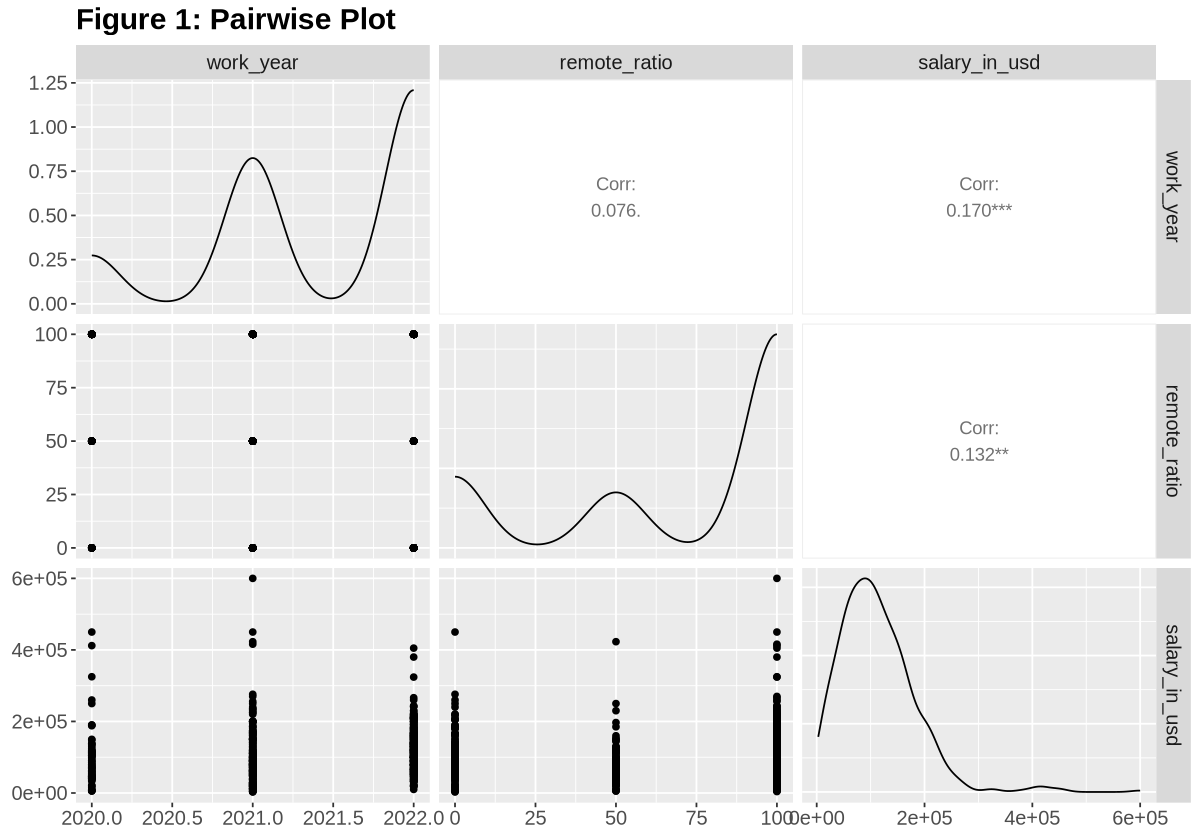

In [7]:
# Main developer: Yao
# Adjust these numbers so the plot looks good in your desktop.
options(repr.plot.width = 10, repr.plot.height = 7) 

ds_numerical_pair_plots <- 
  numerical_features %>%
  ggpairs(progress = FALSE) +
  labs(title = "Figure 1: Pairwise Plot") +
  theme(text = element_text(size = 15),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

ds_numerical_pair_plots

There doesn't seem to be that strong of an affect just based on scatter plots alone. Instead, histograms can be used to see the distribution based on what to analyze it by.

### Histograms

Histograms of `salary_in_usd` of different  `experience_level`, and `remote_ratio` were plotted

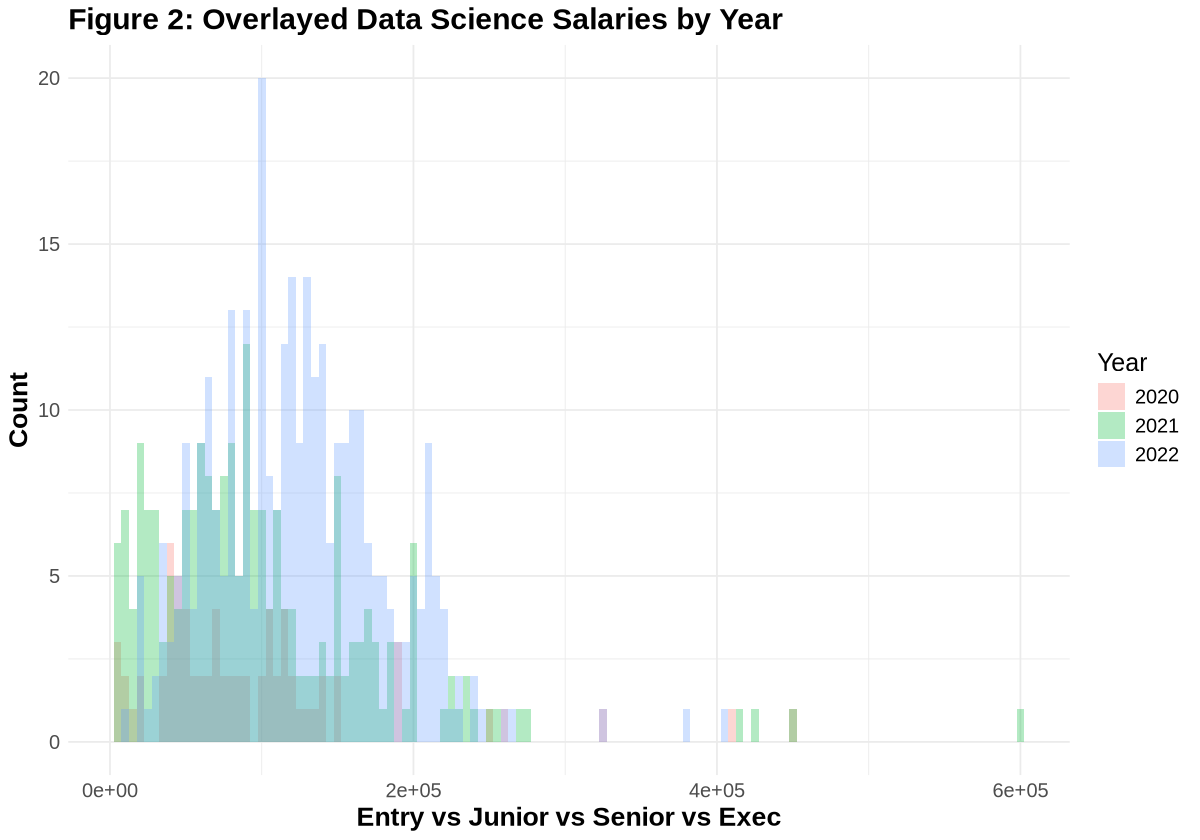

In [8]:
# Main developer: Yao
# Histogram of Salary based on Work Year

ggplot(ds_df, aes(x = salary_in_usd, fill = factor(work_year))) +
  geom_histogram(binwidth = 5000, alpha = 0.3, position = "identity") +
  labs(title = "Figure 2: Overlayed Data Science Salaries by Year",
       x = "Entry vs Junior vs Senior vs Exec",
       y = "Count",
       fill = "Year") +
  theme_minimal() +
  theme(text = element_text(size = 15),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

It can be observed that the year `2022` is centered at a higher salary value than the past years. It is worthy to note that `2020` also doesn't have as many observations as `2021` or `2022`. 

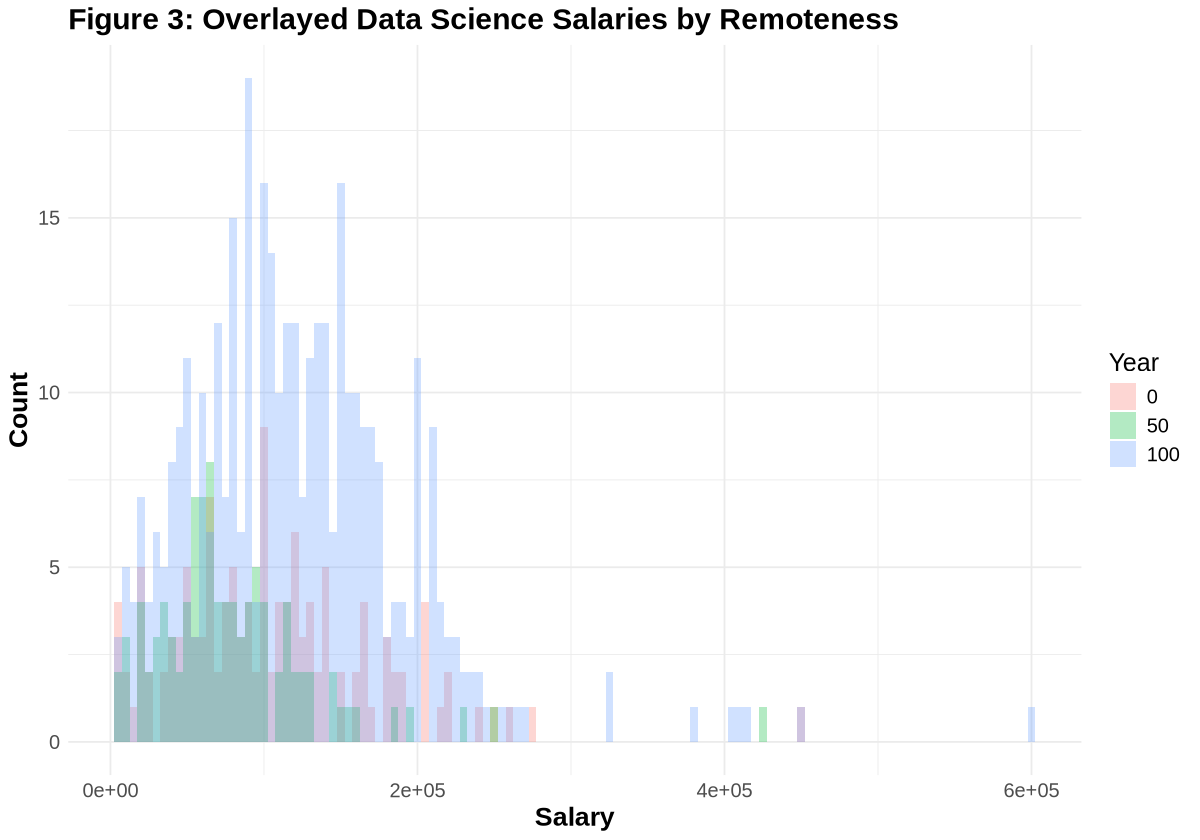

In [9]:
# Main developer: Yao
# Histogram of Salary based on Remote Ratio

ggplot(ds_df, aes(x = salary_in_usd, fill = factor(remote_ratio))) +
  geom_histogram(binwidth = 5000, alpha = 0.3, position = "identity") +
  labs(title = "Figure 3: Overlayed Data Science Salaries by Remoteness",
       x = "Salary",
       y = "Count",
       fill = "Year") +
  theme_minimal() +
  theme(text = element_text(size = 15),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

It can be observed that remoteness doesn't see to have that much of an affect on salary. It is worthy to note that there are way more observations for remoteness of `100` than `0` or `50`.

### Boxplots

For the categorical variables, boxplots are used for categorical variables to better see quartile distributions of each category.

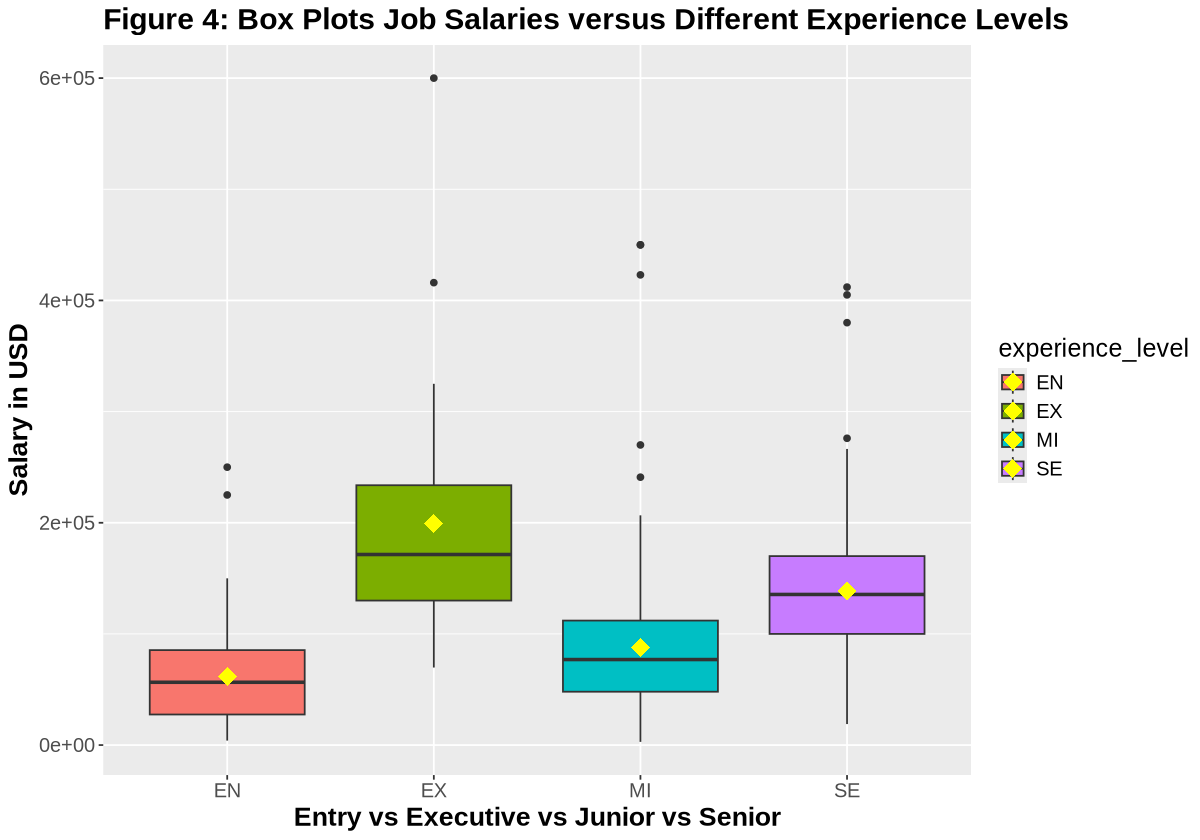

In [10]:
# Main developer: Yao
# Salary vs Experience Level
options(repr.plot.width = 10, repr.plot.height = 7) 

experience_level_boxplots <- 
    ds_df %>%
    ggplot() +
    geom_boxplot(aes(experience_level, salary_in_usd, fill = experience_level)) +
    theme(text = element_text(size = 22)) +
    ggtitle("Figure 4: Box Plots Job Salaries versus Different Experience Levels ") +
    xlab("Entry vs Executive vs Junior vs Senior") +
    ylab("Salary in USD") +
    stat_summary(aes(experience_level, salary_in_usd, fill = experience_level),
        fun = mean, 
        colour = "yellow",
        geom = "point",
        shape = 18,
        size = 5
    ) + 
    theme(text = element_text(size = 15),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

experience_level_boxplots

As expected, the boxplot distribution of a more experienced person is higher than someone with less experience.

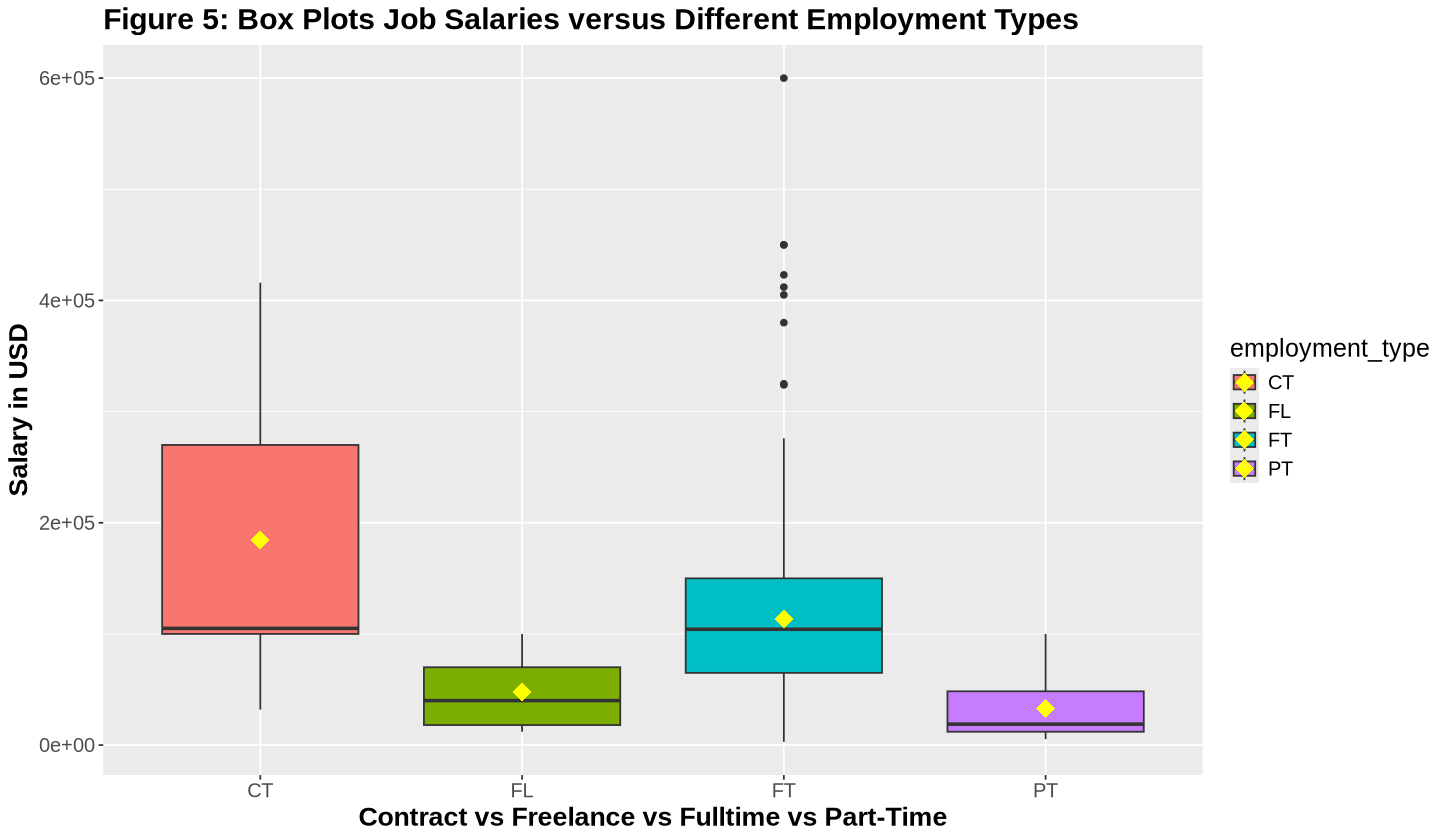

In [11]:
# Main developer: Yao
# Salary vs Employment Type
options(repr.plot.width = 12, repr.plot.height = 7) 

employment_type_boxplots <- 
    ds_df %>%
    ggplot() +
    geom_boxplot(aes(employment_type, salary_in_usd, fill = employment_type)) +
    theme(text = element_text(size = 22)) +
    ggtitle("Figure 5: Box Plots Job Salaries versus Different Employment Types") +
    xlab("Contract vs Freelance vs Fulltime vs Part-Time") +
    ylab("Salary in USD") +
    stat_summary(aes(employment_type, salary_in_usd, fill = employment_type),
        fun = mean, 
        colour = "yellow",
        geom = "point",
        shape = 18,
        size = 5
    ) + 
    theme(text = element_text(size = 15),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

employment_type_boxplots

As seen, the order of decreasing salaries: Contract, Full-Time, Freelance and Part-time. It is also worthy to note that there are only 1% contractors + freelance observations compared to the 97% full-time observations. But generally, it makes sense that contractors make the most since it is external to the company.

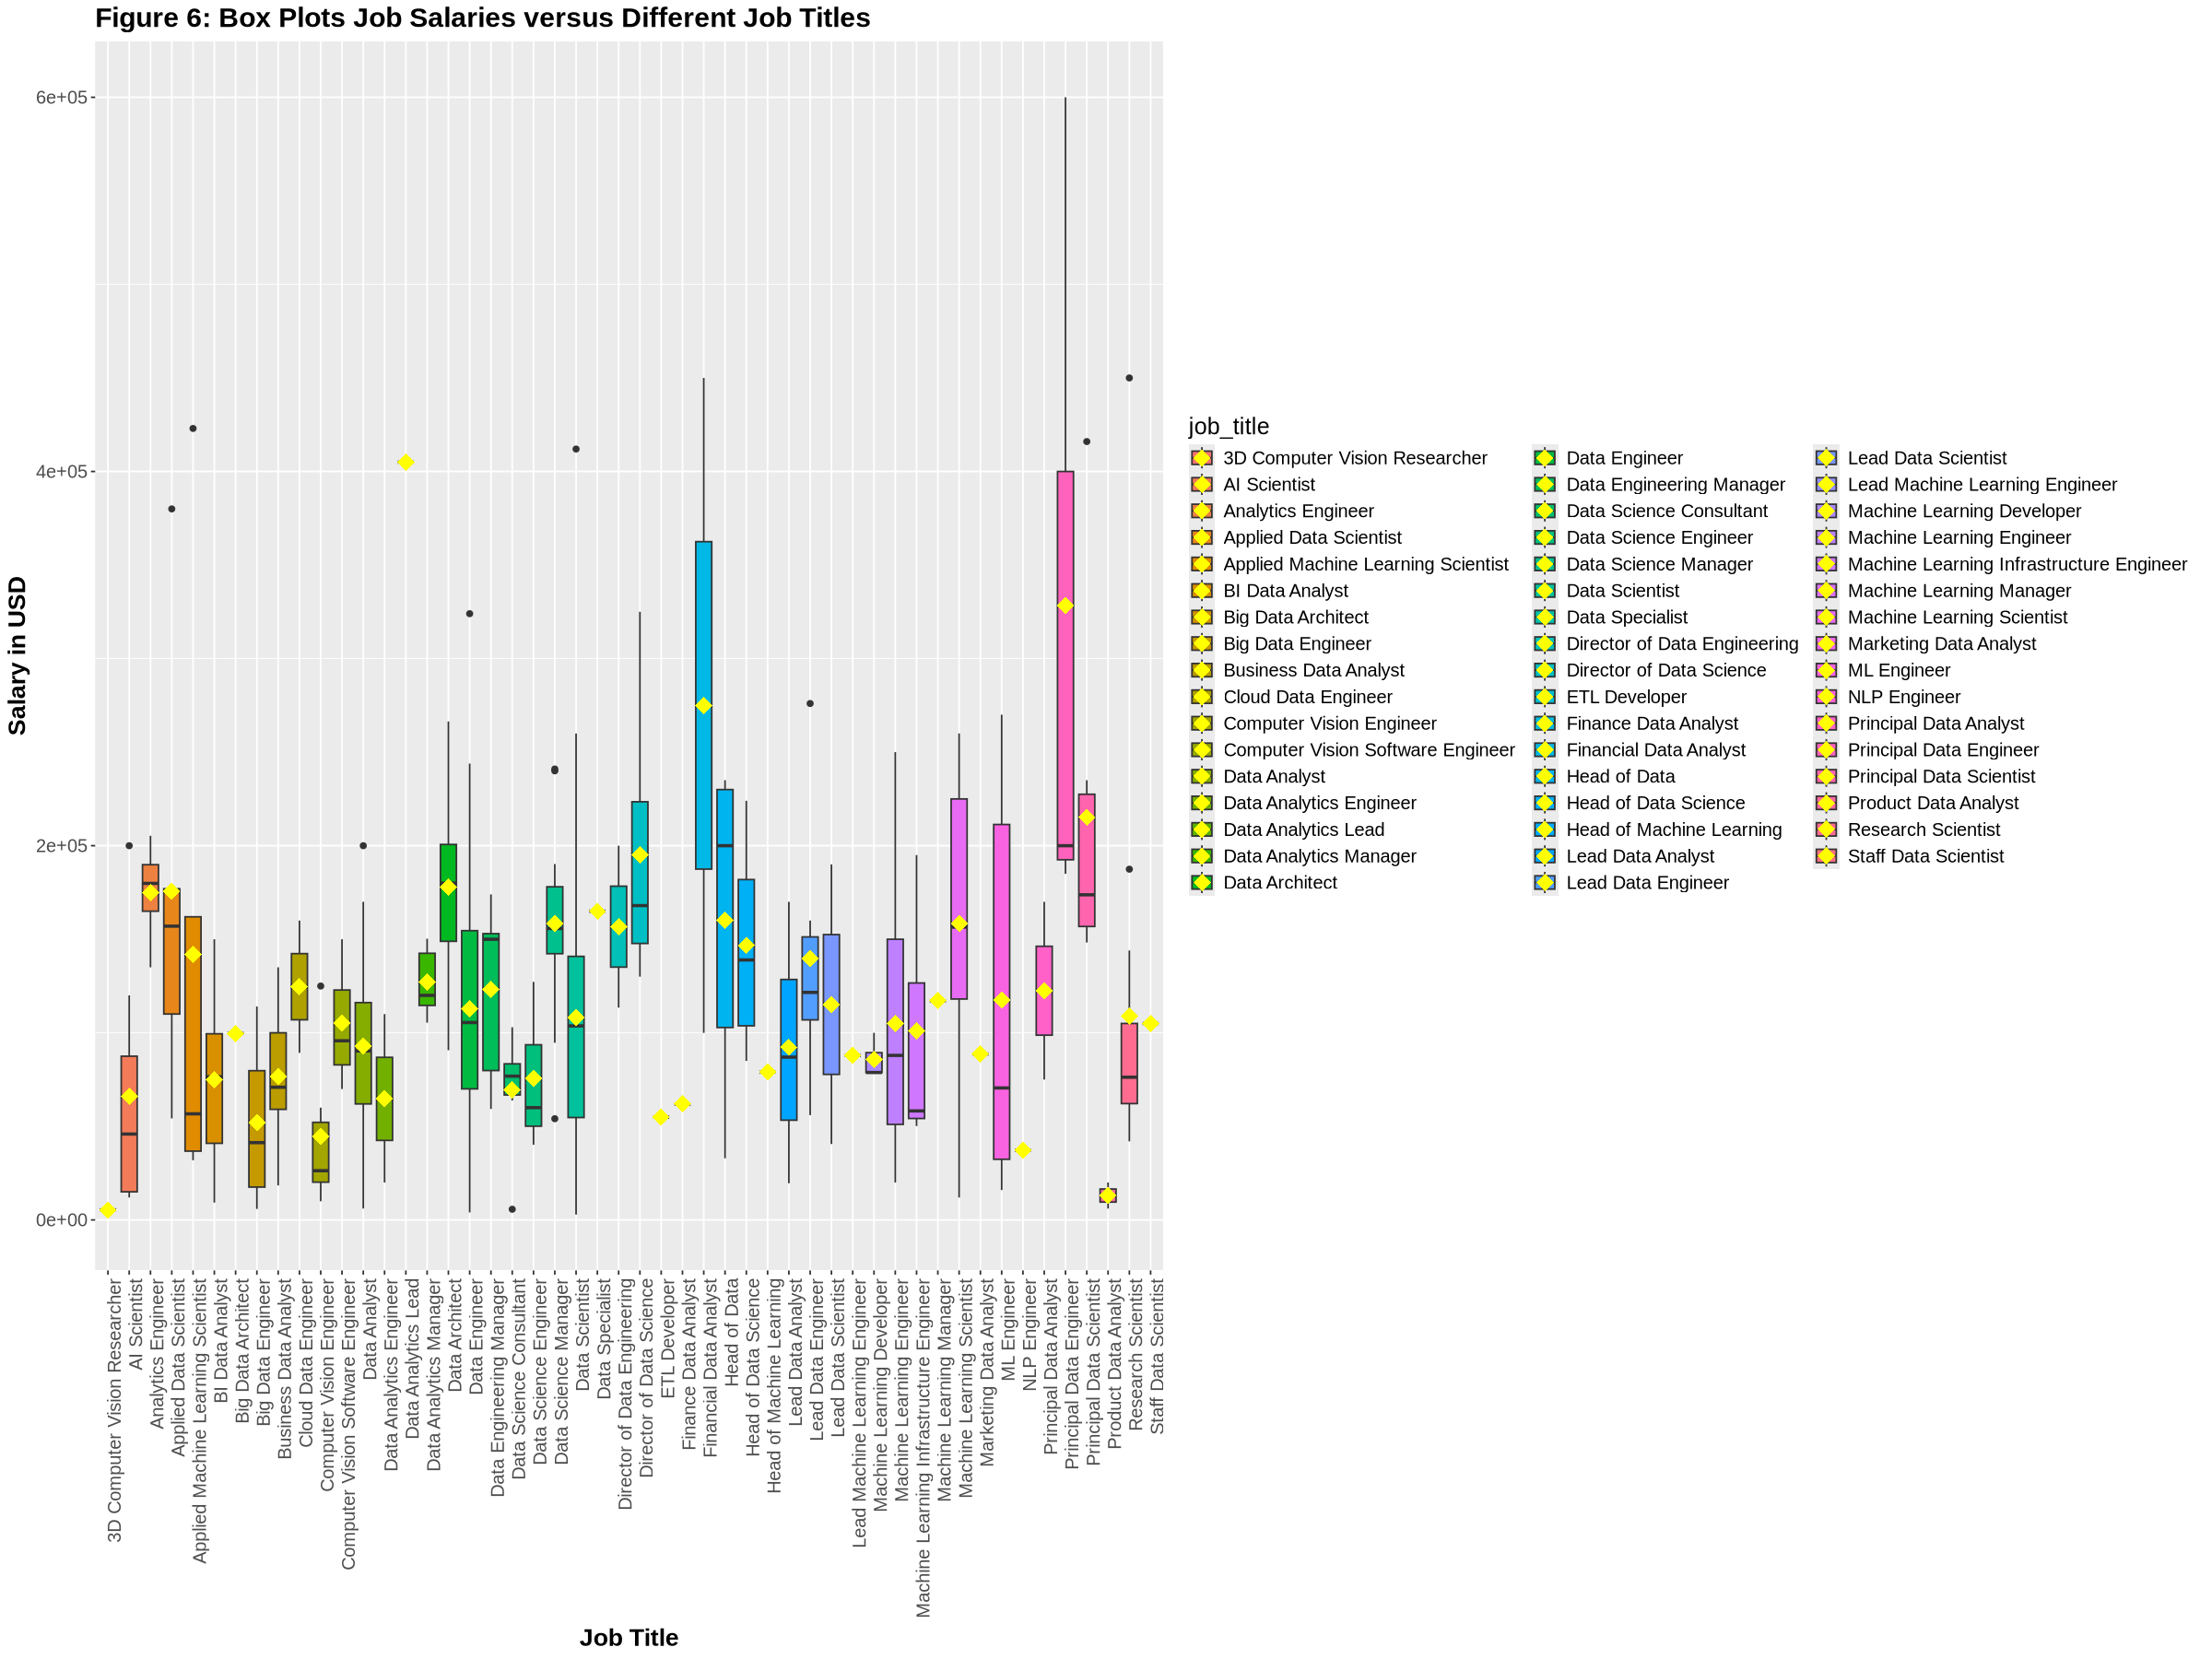

In [12]:
# Main developer: Yao
# Salary vs Job Title
options(repr.plot.width = 20, repr.plot.height = 15) 

job_title_boxplots <- 
    ds_df %>%
    ggplot() +
    geom_boxplot(aes(job_title, salary_in_usd, fill = job_title)) +
    theme(text = element_text(size = 9)) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) + 
    ggtitle("Figure 6: Box Plots Job Salaries versus Different Job Titles") +
    xlab("Job Title") +
    ylab("Salary in USD") +
    stat_summary(aes(job_title, salary_in_usd, fill = job_title),
        fun = mean, 
        colour = "yellow",
        geom = "point",
        shape = 18,
        size = 5
    ) + 
    theme(text = element_text(size = 15),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

job_title_boxplots

From the boxplots above, it looks like that positions at a high levels such as `Principal Data Engineer` and `Head of Data` make more than most jobs but also positions like `Financial Data Analysts` Make more as well.

Jobs like `3D Computer Vision Researcher` `ETL Developer` and `Freelance Data Analyst` don't make that much. 

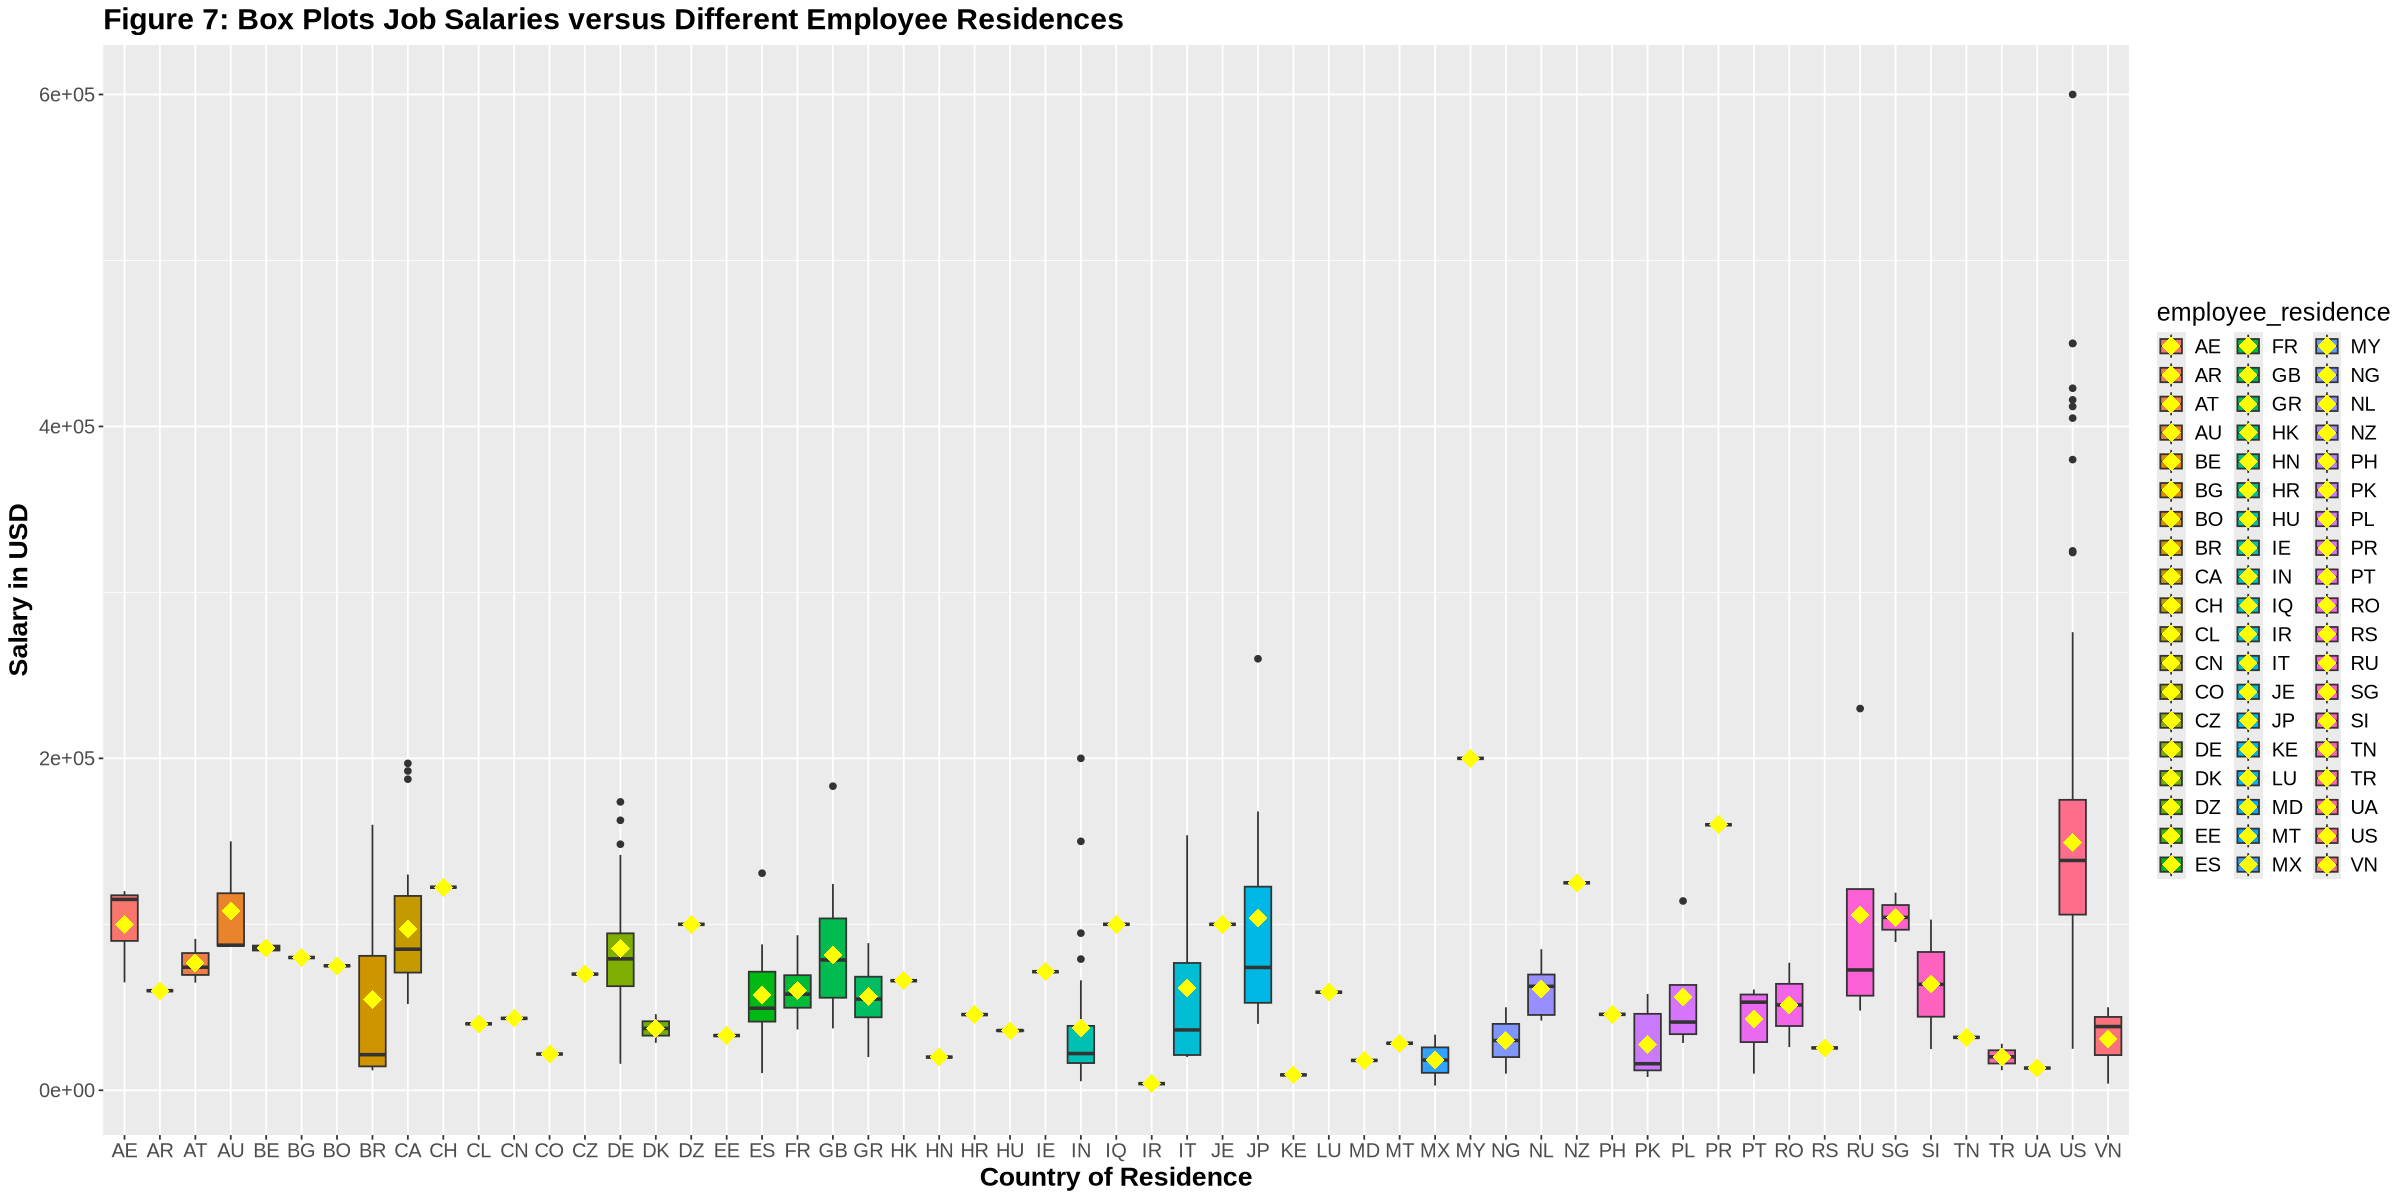

In [13]:
# Main developer: Yao
# Salary vs Employee Residence
options(repr.plot.width = 20, repr.plot.height = 10) 

employee_residence_boxplots <- 
    ds_df %>%
    ggplot() +
    geom_boxplot(aes(employee_residence, salary_in_usd, fill = employee_residence)) +
    theme(text = element_text(size = 9)) +
    ggtitle("Figure 7: Box Plots Job Salaries versus Different Employee Residences") +
    xlab("Country of Residence") +
    ylab("Salary in USD") +
    stat_summary(aes(employee_residence, salary_in_usd, fill = employee_residence),
        fun = mean, 
        colour = "yellow",
        geom = "point",
        shape = 18,
        size = 5
    ) + 
    theme(text = element_text(size = 15),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

employee_residence_boxplots

People who reside in the `US` pay the most by far and people who reside in countries who may not put as much emphasis on technology make less. This may be because that people want to find jobs that are close to where they live. However, some people who want to look for better paying jobs in data science look for jobs or move to areas that pay well. Thus `company_location` is a better metric to evaluate.

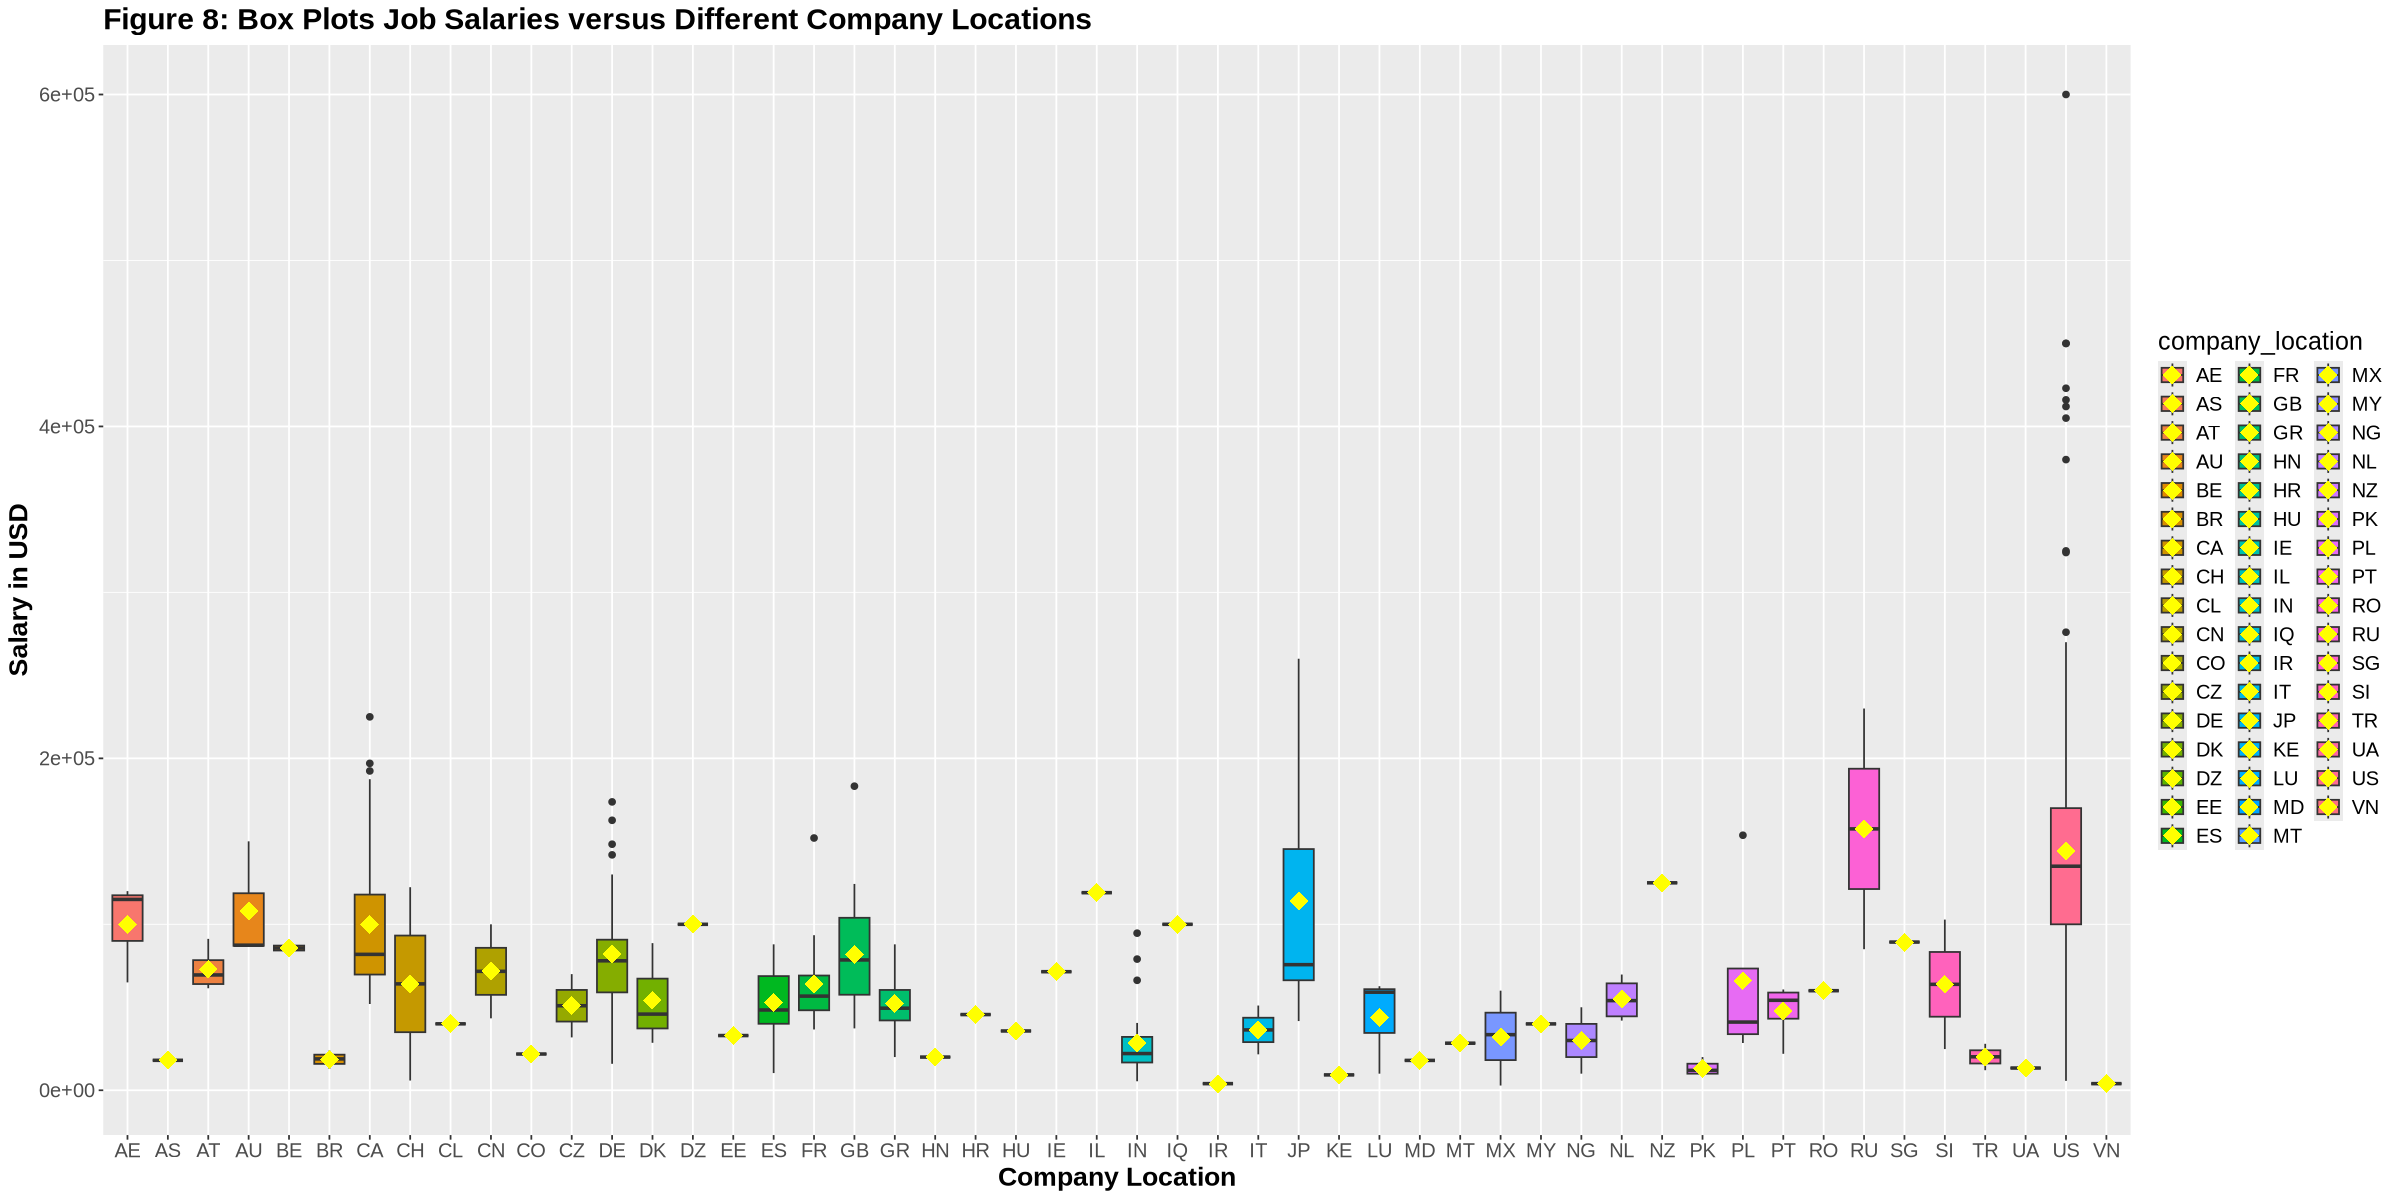

In [14]:
# Main developer: Yao
# Salary vs Employee Residence
options(repr.plot.width = 20, repr.plot.height = 10) 

company_location_boxplots <- 
    ds_df %>%
    ggplot() +
    geom_boxplot(aes(company_location, salary_in_usd, fill = company_location)) +
    theme(text = element_text(size = 9)) +
    ggtitle("Figure 8: Box Plots Job Salaries versus Different Company Locations") +
    xlab("Company Location") +
    ylab("Salary in USD") +
    stat_summary(aes(company_location, salary_in_usd, fill = company_location),
        fun = mean, 
        colour = "yellow",
        geom = "point",
        shape = 18,
        size = 5
    ) + 
    theme(text = element_text(size = 15),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

company_location_boxplots

Results were actually surprising, here. Companies based in `RU` actually pay more than companies based in the `US` even though people who reside in `RU` make less than people who reside in `US`. This may be due to Russia hiring more people who reside in different countries. Other than that, it's the same companies in the countries that pay the lowest.

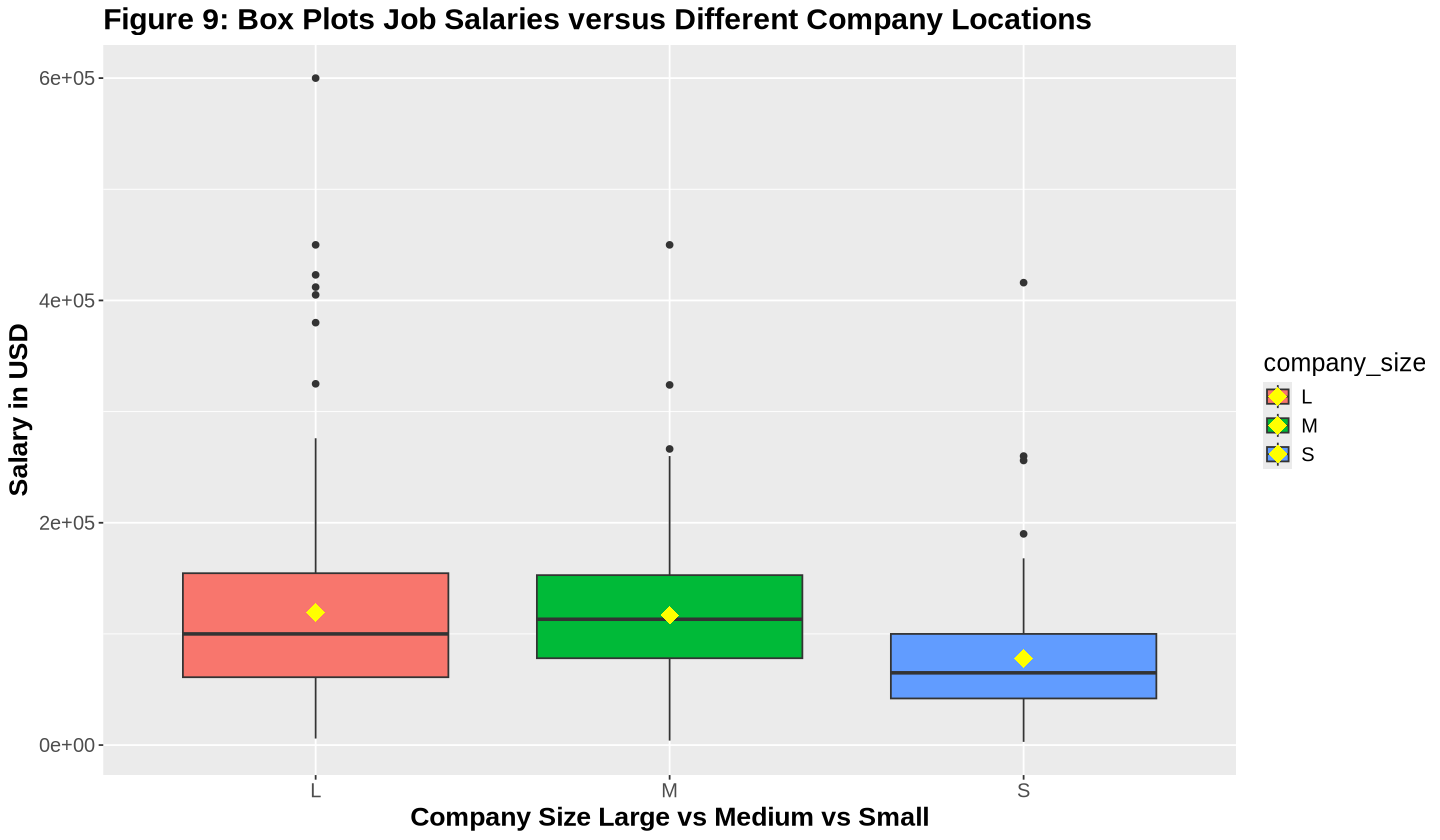

In [15]:
# Main developer: Yao
# Salary vs Company Size
options(repr.plot.width = 12, repr.plot.height = 7) 

company_size_boxplots <- 
    ds_df %>%
    ggplot() +
    geom_boxplot(aes(company_size, salary_in_usd, fill = company_size)) +
    theme(text = element_text(size = 9)) +
    ggtitle("Figure 9: Box Plots Job Salaries versus Different Company Locations") +
    xlab("Company Size Large vs Medium vs Small") +
    ylab("Salary in USD") +
    stat_summary(aes(company_size, salary_in_usd, fill = company_size),
        fun = mean, 
        colour = "yellow",
        geom = "point",
        shape = 18,
        size = 5
    ) + 
    theme(text = element_text(size = 15),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

company_size_boxplots


From the boxplots it looks like only smaller sizes pay less. the bigger companies and medium-sized companies pay roughly the same. It is also worth to note that there were fewer observations for the smaller companies.

### Exploratory Data Analysis and Visualization Discussion

Based on the results, it can be seen what types of factors influence high paying jobs. From the histograms, it can be seen that year plays a role in how much it changes salaries potentially because of inflation each year and influence from the COVID-19. 

From the boxplots, experience plays a role because more experienced people typically make more than less experienced people. 

Job type also affects salaries because if the job is a contract job, then it would pay significantly higher compared to normal jobs. Part-time and freelance jobs don't pay as much. 

Job titles that have more of a leading position and financial data analysts make the most while 3D computer vision researchers and product data analysts make the least.

People who reside in the US and companies based on the US in general make more which is a large determinning factor in data analysis job salaries. The boxplots show that they are typically more ahead of other countries.

Company size only makes a difference towards salaries if the company is small. There is not of much of a difference in salaries between large and medium-sized companies.

### Limitations: Unbalanced Dataset

The dataset is significantly unbalanced. As seen in the data description, there may be different results if minority groups had more observations. For instance, a junior level data scientist in the US may make more than a senior level data scientist in Kenya. To mitigate this effect, the model should analyze as many variables as possible and select the ones that end up having the most significance.


## Methods: Plan

The **inference** question we are answering is:

> Which attributes of a data science job and/or employee best predicts the data scientist's salary in USD?

To answer this question, we will be using stepwise selection methods, specifically forward and backward selection. These methods systematically identify the most important predictors for a linear regression model. For our model, selection will be based on the Akaike Information Criterion (AIC), a statistical measure that evaluates model fit while penalizing unnecessary predictors to avoid overfitting. Some other criteria that may be used include the Bayesian Information Criterion (BIC), which applies a stricter penalty for model complexity, and/or Mallows's Cp, which evaluates the trade-off between model bias and variance across models.

### Why are these Methods Appropriate?

Forward and backward selection are both systematic and iterative methods for feature selection, identifying the most relevant predictors for a model. Forward selection begins with no predictors and iteratively adds the most statistically significant ones, while backward selection starts with all predictors and iteratively removes those that are less significant. These methods are particularly effective for handling high-dimensional data, as they reduce the model to only the most relevant features, addressing the curse of dimensionality and enhancing computational efficiency. Additionally, their straightforward and systematic approach makes these methods easy to interpret and apply, providing clear insights into the model-building process.

### Assumptions required for the Methods

In order for forward and backward selection to produce valid results and inferences, the following assumptions of linear regression models need to be met:
- **Linearity**: There is a linear relationship between the response (salary in USD) and predictors.
- **Independence**: Errors are independent of one another.
- **Normality**: Error terms should follow a normal conditional distribution.
- **Homoscedasticity**: Variance of the error terms should be equal.
- **No Multicollinearity**: Predictors should not be highly correlated to avoid LS estimators being unstable or unreliable.

### Potential Limitations or Weaknesses of the Methods

While forward and backward selection are valuable methods for feature selection, they have limitations. Both methods rely on statistical significance and AIC, and involve multiple comparisons, which may lead to overfitting to the data, leading to biased estimates, and potentially inflated Type I error. This would also reduce the model's ability to generalize on new, unseen data. Another challenge is multicollinearity, which is when some predictors are highly correlated. If multicollinearity is present, they may not be considered or detected. Furthermore, due to the assumptions of the model, the stepwise methods may fail to detect interactionts between predictors or non-linear relationships. 

---

In summary, forward and backward selection methods using AIC offer a structured approach to identify the best predictors for predicting data science job salaries. Although these methods have limitations, such as the risk of overfitting and challenges with multicollinearity, their ability to systematically reduce the model size while balancing fit and complexity makes them effective methods for this analysis.

### Computational Code and Output

### Implementation of a Proposed Model

To perform the analysis, we will be using **forward** and **backward** selection to select the features that predict the response variable `salary_in_usd`, which will then be used in my multiple linear regression (MLR) model. The forward selection process begins with no predictors (null model) and iteratively adds the most significant predictor. Backward selection is the reversed process; it begins with all predictors and iteratively removes the least significant predictor. 

The metric we will be using for my stepwise selection is the Akaike Information Criterion (AIC). As mentioned earlier, AIC is a widely used metric because it balances model fit and complexity. It rewards models with a better fit (lower residual error) but penalizes models with too many predictors to avoid overfitting. Numerous model selection metrics, such as AIC, BIC, adjusted $R^2$, can produce different results, but they often agree in practice when selecting the most important predictors.

#### Data Cleaning and Wrangling

The inference is performed on `salary_in_usd`, so the variables `salary_currency` and `salary` will be removed. Both variables can be inferred from other variables, such as `company_location` and `salary_in_usd`, and are highly correlated with the response variable, so they are removed to avoid issues with mutlicollinearity.

In [16]:
# Main developer: Jessie
job_data <- ds_df %>%
    select(-salary_currency, -salary)

Based on the EDA, both the `employee_residence` and `company_location` variables contain 50 distinct levels. To simplify the analysis, these locations will be mapped to 7 broader regions.

In [17]:
# Main developer: Jessie
job_data$company_location <- as.factor(countrycode(job_data$company_location, "iso2c", "region"))
job_data$employee_residence <- as.factor(countrycode(job_data$employee_residence, "iso2c", "region"))

table(job_data$company_location)


       East Asia & Pacific      Europe & Central Asia 
                        16                        159 
 Latin America & Caribbean Middle East & North Africa 
                         9                          8 
             North America                 South Asia 
                       385                         27 
        Sub-Saharan Africa 
                         3 

Similarly, the `job_title` variable contains 50 distinct values, which will be mapped to 5 broader categories:

- **Data Analyst**
- **Data Engineer**
- **Data Scientist**
- **AI/ML Specialist**
- **Data Leadership**


In [18]:
# Main developer: Jessie
# Mapping for job titles to broader categories

job_mapping <- c(
  # Data Analyst
  "BI Data Analyst" = "Data Analyst",
  "Business Data Analyst" = "Data Analyst",
  "Data Analyst" = "Data Analyst",
  "Data Analytics Lead" = "Data Analyst",
  "Data Analytics Manager" = "Data Analyst",
  "Financial Data Analyst" = "Data Analyst",
  "Finance Data Analyst" = "Data Analyst",
  "Marketing Data Analyst" = "Data Analyst",
  "Product Data Analyst" = "Data Analyst",
  "Lead Data Analyst" = "Data Analyst",
  "Principal Data Analyst" = "Data Analyst",

  # Data Engineer
  "Big Data Architect" = "Data Engineer",
  "Big Data Engineer" = "Data Engineer",
  "Cloud Data Engineer" = "Data Engineer",
  "Data Architect" = "Data Engineer",
  "Data Engineer" = "Data Engineer",
  "Data Engineering Manager" = "Data Engineer",
  "Director of Data Engineering" = "Data Engineer",
  "ETL Developer" = "Data Engineer",
  "Lead Data Engineer" = "Data Engineer",
  "Principal Data Engineer" = "Data Engineer",
  "Analytics Engineer" = "Data Engineer",
  "Data Analytics Engineer" = "Data Engineer",

  # Data Scientist
  "Applied Data Scientist" = "Data Scientist",
  "Data Science Consultant" = "Data Scientist",
  "Data Science Engineer" = "Data Scientist",
  "Data Science Manager" = "Data Scientist",
  "Data Scientist" = "Data Scientist",
  "Data Specialist" = "Data Scientist",
  "Lead Data Scientist" = "Data Scientist",
  "Principal Data Scientist" = "Data Scientist",
  "Staff Data Scientist" = "Data Scientist",
  "Research Scientist" = "Data Scientist",

  # AI/ML Specialist
  "3D Computer Vision Researcher" = "AI/ML Specialist",
  "AI Scientist" = "AI/ML Specialist",
  "Applied Machine Learning Scientist" = "AI/ML Specialist",
  "Computer Vision Engineer" = "AI/ML Specialist",
  "Computer Vision Software Engineer" = "AI/ML Specialist",
  "Head of Machine Learning" = "AI/ML Specialist",
  "Lead Machine Learning Engineer" = "AI/ML Specialist",
  "Machine Learning Developer" = "AI/ML Specialist",
  "Machine Learning Engineer" = "AI/ML Specialist",
  "Machine Learning Infrastructure Engineer" = "AI/ML Specialist",
  "Machine Learning Manager" = "AI/ML Specialist",
  "Machine Learning Scientist" = "AI/ML Specialist",
  "ML Engineer" = "AI/ML Specialist",
  "NLP Engineer" = "AI/ML Specialist",

  # Data Leadership
  "Director of Data Science" = "Data Leadership",
  "Head of Data" = "Data Leadership",
  "Head of Data Science" = "Data Leadership"
)

# Update job_titles in job_data
job_data$job_title <- job_mapping[job_data$job_title]

table(job_data$job_title)


AI/ML Specialist     Data Analyst    Data Engineer  Data Leadership 
              86              127              180               16 
  Data Scientist 
             198 

**Updated data:**

In [19]:
# Main developer: Jessie
# Contributor: Nathan

job_data_df <- as.data.frame(head(job_data, 5))
stargazer(job_data_df, type = "text", title = " Table 5: Updated Job Data ", digits = 2, summary = FALSE)


Table 5: Updated Job Data
  work_year experience_level employment_type    job_title     salary_in_usd employee_residence remote_ratio company_location company_size 
------------------------------------------------------------------------------------------------------------------------------------------
1   2,020          MI              FT         Data Scientist     79,833           Europe       Central Asia        0            Europe    
2   2,020          SE              FT        AI/ML Specialist    260,000        East Asia        Pacific           0           East Asia  
3   2,020          SE              FT         Data Engineer      109,024          Europe       Central Asia        50           Europe    
4   2,020          MI              FT          Data Analyst      20,000       Latin America     Caribbean          0         Latin America
5   2,020          SE              FT        AI/ML Specialist    150,000      North America         50       North America         L      


#### Splitting Data into Training and Selection

Using the same dataset to select and estimate variables violates the analysis's assumptions and invalidates inference results - this is known as the post-inference problem. The same data can not be used to both select and make inferences; hence, we will need to split the dataset into two sets: a **selection** set (30% of the data), and a **training** set (70% of the data).

In [20]:
# Main developer: Jessie
# Contributor: Nathan
# For reproducibility
set.seed(123)

job_data <- 
    job_data %>%
    mutate(id = row_number())

# Sampling without replacement
training_data <- 
    job_data %>%
    slice_sample(prop = 0.5, replace = FALSE)

selection_set <- 
    job_data %>%
    anti_join(training_data, by = "id")

training_data <- 
    training_data %>% 
    select(-id)

selection_set <- 
    selection_set %>% 
    select(-id)

training_data_df <- as.data.frame(head(training_data, 3))
selection_set_df <- as.data.frame(head(selection_set, 3)) 
stargazer(training_data_df, type = "text", title = " Table 6: Training Data ", digits = 2, summary = FALSE)
stargazer(selection_set_df, type = "text", title = " Table 7: Selection Set ", digits = 2, summary = FALSE) 



Table 6: Training Data
  work_year experience_level employment_type    job_title     salary_in_usd employee_residence remote_ratio company_location company_size
-----------------------------------------------------------------------------------------------------------------------------------------
1   2,022          MI              FT         Data Engineer      78,526           Europe       Central Asia       100           Europe   
2   2,022          MI              PT         Data Engineer      54,957           Europe       Central Asia        50           Europe   
3   2,021          EN              FT        AI/ML Specialist    81,000       North America         50       North America        S      
-----------------------------------------------------------------------------------------------------------------------------------------

Table 7: Selection Set
  work_year experience_level employment_type    job_title     salary_in_usd employee_residence remote_ratio company_location

#### Forward Selection

Since the data science job salary dataset contains many categorical features, I will be using the `step()` function from the pre-installed R `stats` package. This is because `step()` treats categorical variables as a single feature - it considers the entire factor variable altogether. `step()` also performs the model selection based on the AIC metric. Meanwhile, `regsubsets()` from the `leaps` package only works for numerical variables and it will create dummy variables for the categorical variables, so each of them will be considered separately.

First we will start with the forward selection model using `step()`. A base model with only the intercept and a full model with all predictors are defined to guide the selection process.

In [21]:
# Main developer: Jessie
# Base model with just the intercept
base_model <- lm(salary_in_usd ~ 1, data = selection_set)

# Full model with all predictors
full_model <- lm(salary_in_usd ~ ., data = selection_set)

# Perform forward selection
forward_model_sel <- stats::step(base_model, scope = list(lower = base_model, upper = full_model), 
                         direction = "forward")

glance(forward_model_sel)

Start:  AIC=6738.43
salary_in_usd ~ 1

                     Df  Sum of Sq        RSS    AIC
+ employee_residence  6 4.1186e+11 8.6615e+11 6632.2
+ company_location    6 3.8963e+11 8.8838e+11 6639.9
+ experience_level    3 2.9825e+11 9.7976e+11 6663.6
+ company_size        2 6.7318e+10 1.2107e+12 6726.0
+ work_year           1 5.5275e+10 1.2227e+12 6727.0
+ remote_ratio        1 5.4173e+10 1.2238e+12 6727.3
+ employment_type     2 4.8008e+10 1.2300e+12 6730.8
<none>                             1.2780e+12 6738.4
+ job_title           4 5.2641e+09 1.2727e+12 6745.2

Step:  AIC=6632.17
salary_in_usd ~ employee_residence

                   Df  Sum of Sq        RSS    AIC
+ experience_level  3 8.4833e+10 7.8131e+11 6606.8
+ job_title         4 6.0069e+10 8.0608e+11 6618.3
+ company_size      2 3.0318e+10 8.3583e+11 6625.3
<none>                           8.6615e+11 6632.2
+ remote_ratio      1 4.4101e+09 8.6174e+11 6632.6
+ employment_type   2 7.7259e+09 8.5842e+11 6633.4
+ work_year       

r.squared adj.r.squared sigma    statistic p.value      df logLik  
value 0.4576151 0.4293659     49059.66 16.19922  2.435656e-30 15 -3706.58
      AIC     BIC      deviance     df.residual nobs
value 7447.16 7510.349 693172734994 288         304

<br>

The **forward selection model** formula is:

In [22]:
# Main developer: Jessie
formula(forward_model_sel)

salary_in_usd ~ employee_residence + experience_level + company_size + 
    job_title

#### Backward Selection

Next, we will use `step()` to obtain the backward selection model, starting with the full model and iteratively removing predictors to simplify the model.

In [23]:
# Main developer: Jessie
backward_model_sel <- stats::step(full_model, direction = "backward")

Start:  AIC=6591.13
salary_in_usd ~ work_year + experience_level + employment_type + 
    job_title + employee_residence + remote_ratio + company_location + 
    company_size

                     Df  Sum of Sq        RSS    AIC
- company_location    5 1.3686e+10 6.8594e+11 6587.3
- work_year           1 3.7074e+07 6.7229e+11 6589.1
- employment_type     2 4.7013e+09 6.7695e+11 6589.2
- remote_ratio        1 1.6648e+09 6.7391e+11 6589.9
<none>                             6.7225e+11 6591.1
- employee_residence  5 2.6753e+10 6.9900e+11 6593.0
- company_size        2 3.0823e+10 7.0307e+11 6600.8
- job_title           4 4.4164e+10 7.1641e+11 6602.5
- experience_level    3 7.8035e+10 7.5028e+11 6618.5

Step:  AIC=6587.25
salary_in_usd ~ work_year + experience_level + employment_type + 
    job_title + employee_residence + remote_ratio + company_size

                     Df  Sum of Sq        RSS    AIC
- employment_type     2 3.2586e+09 6.8919e+11 6584.7
- work_year           1 3.7342e+08 6

<br>

The **backward selection model** formula is:

In [24]:
# Main developer: Jessie
formula(backward_model_sel)

salary_in_usd ~ experience_level + job_title + employee_residence + 
    company_size

#### Comparing Results of Stepwise Models

For this selection data, the forward and backward stepwise selection models yield the same set of predictors, likely because both methods converge to the same optimal model based on AIC. The predictors selected by both models are `company_location`, `company_size`, `experience_level`, and `job_title`.

Comparing the AIC values for the base intercept-only model, full model, forward selection model, and the backward selection model, we can observe that the AIC value for the forward (and backward) selection model is indeed smaller than those of the base and full model.

*Note: The difference in AIC values between the `glance()` function and the last iteration from the `step()` function is likely due to variations in how these functions calculate and handle the AIC during model fitting.*

In [25]:
# Main developer: Jessie
#Contributor: Nathan
AIC_base_model <- as.data.frame(glance(base_model))
AIC_full_model <- as.data.frame(glance(full_model))
AIC_forward_model <- as.data.frame(glance(forward_model_sel))
AIC_backward_model <- as.data.frame(glance(backward_model_sel)) 

stargazer(AIC_base_model, type = "text", title = " Table 7: Base Model Summary ", digits = 2, summary = FALSE) 
stargazer(AIC_full_model, type = "text", title = " Table 8: Full Model Summary ", digits = 2, summary = FALSE) 
stargazer(AIC_forward_model, type = "text", title = " Table 9: Forward Model Summary ", digits = 2, summary = FALSE) 
stargazer(AIC_backward_model, type = "text", title = " Table 10: Backward Model Summary ", digits = 2, summary = FALSE)


Table 7: Base Model Summary
  r.squared adj.r.squared   sigma   statistic p.value df  logLik     AIC      BIC          deviance       df.residual nobs
--------------------------------------------------------------------------------------------------------------------------
1     0           0       64,944.99                      -3,799.57 7,603.14 7,610.57 1,278,008,893,142.00     303     304 
--------------------------------------------------------------------------------------------------------------------------

Table 8: Full Model Summary
  r.squared adj.r.squared   sigma   statistic p.value df  logLik     AIC      BIC         deviance      df.residual nobs
------------------------------------------------------------------------------------------------------------------------
1   0.47        0.43      49,086.63   10.48      0    24 -3,701.92 7,455.84 7,552.49 672,249,726,825.00     279     304 
---------------------------------------------------------------------------------------

#### Fitted MLR Model

Now, we fit the MLR model using the predictors selected from the stepwise selection process, applied to the training data.

In [26]:
# Main developer: Jessie
mlr_model <- lm(
    salary_in_usd ~ company_location + company_size + experience_level + job_title,
    data = training_data
)

tidy(mlr_model)
glance(mlr_model)


term                                       estimate   std.error statistic 
1  (Intercept)                                 96904.287 22659.323  4.2765746
2  company_locationEurope & Central Asia      -43648.692 21373.879 -2.0421512
3  company_locationLatin America & Caribbean  -88956.454 30515.754 -2.9150993
4  company_locationMiddle East & North Africa -63388.177 38427.213 -1.6495648
5  company_locationNorth America               22739.415 21355.301  1.0648136
6  company_locationSouth Asia                 -79484.320 25348.004 -3.1357230
7  company_locationSub-Saharan Africa         -52133.690 44302.418 -1.1767685
8  company_sizeM                               -2901.343  7205.049 -0.4026820
9  company_sizeS                              -20228.969 10966.525 -1.8446106
10 experience_levelEX                         131877.327 18643.857  7.0735002
11 experience_levelMI                          16694.096 10742.480  1.5540263
12 experience_levelSE                          42317.025 11022.030  3.8393131
13 job_titleData Analyst                      -32681.613 11529.656 -2.8345696
14 job_titleData Engineer                      -3517.783 11033.326 -0.3188325
15 job_titleData Leadership                    -6962.516 22052.885 -0.3157191
16 job_titleData Scientist                      6675.292 10425.092  0.6403101
   p.value     
1  2.587243e-05
2  4.205042e-02
3  3.835946e-03
4  1.001260e-01
5  2.878553e-01
6  1.892186e-03
7  2.402630e-01
8  6.874820e-01
9  6.612456e-02
10 1.157153e-11
11 1.212802e-01
12 1.518314e-04
13 4.914572e-03
14 7.500854e-01
15 7.524452e-01
16 5.224819e-01

r.squared adj.r.squared sigma    statistic p.value      df logLik   
value 0.504412  0.4785102     55276.63 19.474    1.436895e-35 15 -3730.511
      AIC      BIC      deviance     df.residual nobs
value 7495.023 7558.156 876930071517 287         303

In [27]:
# Main Delveloper: Nathan
#full MLR regression analysis with stargazer
regression <- lm(
    salary_in_usd ~ company_location + company_size + experience_level + job_title,
    data = training_data) 

stargazer(regression,
        title = " Table 11: Regression Model for the predictors by the stepwise selection process",
        type = "text",
        keep.stat = c("n","rsq"))


Table 11: Regression Model for the predictors by the stepwise selection process
                                       Dependent variable:    
                                   ---------------------------
                                          salary_in_usd       
--------------------------------------------------------------
company_locationEurope                    Central Asia        
                                          (21,373.880)        
                                                              
company_locationLatin America               Caribbean         
                                          (30,515.750)        
                                                              
company_locationMiddle East               North Africa        
                                          (38,427.210)        
                                                              
company_locationNorth America              22,739.420         
                                     

The model has an $R^2$ value of 0.50, indicating that approximately 49% of the variability in salary can be explained by the predictors included in the model. The adjusted $R^2$ value of 0.47 suggests a slightly lower explanatory power after accounting for the number of predictors. Additionally, the low $p$-value (< 0.0001) indicates that the MLR model is statistically significant.

#### Visualization - Coefficient Plot

Below is a coefficient plot displaying the estimates and 95% confidence intervals for the selected predictors in the multiple linear regression model, which helps us to understand and visualize the magnitude and uncertainty of each predictor's effect.

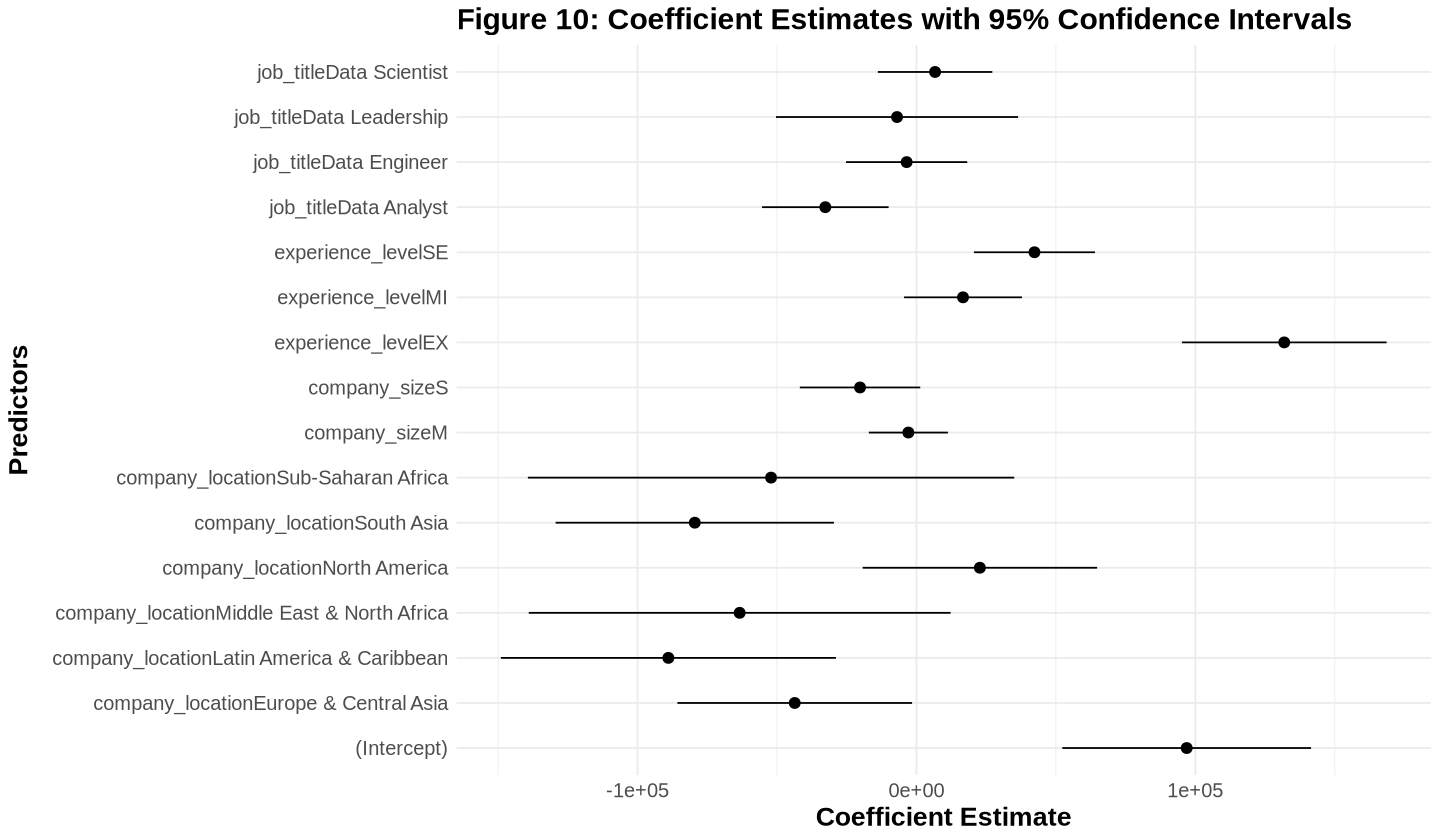

In [28]:
# Main developer: Jessie
coef_data <- tidy(mlr_model, conf.int = TRUE)

ggplot(coef_data, aes(x = term, y = estimate, ymin = conf.low, ymax = conf.high)) +
  geom_pointrange() +
  coord_flip() + 
  labs(
    title = "Figure 10: Coefficient Estimates with 95% Confidence Intervals",
    x = "Predictors",
    y = "Coefficient Estimate"
  ) +
  theme_minimal() + 
  theme(text = element_text(size = 15),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

# 3. Discussion of Results

1. The forward and backward stepwise selection methods which we applied to the dataset coincided on the same set of predictor variables which were: `company_location`, `company_size`, `experience_level` and `job_title`. This convergence between the two methods suggests that the chosen predictors represent the most statistically significant variables influencing data salaries based on the Akaike Information Criterion(AIC). The AIC values confirm that the stepwise models outperform both the base intercept-only model and the full model, providing an effective solution.

    The MLR model chosen by the forward the backward selection process indicates that `company location`, `company size`, `experience level`, and `job title` are the best predictors of data science job salaries in USD. The results of `tidy(mlr_model)` experience level and company size show strong positive correlations with salary, suggesting that more experienced individuals and those in larger companies tend to earn higher salaries. Job title also plays a key role, with certain positions resulting in higher salaries, and as with company location, North America is the only category with a positive coefficent, meaning it is the only region with higher salary compared to the reference category of East Asia and Pacific.

    The final multiple linear regression (MLR) model demonstrates that approximately 50% of the variability in salaries can be explained by the predictors, as indicated by the R-square. R-square value of 0.50. The adjusted R-square value of 0.47 accounts for the number of predictors, showing a slightly lower explanatory power but still indicating a meaningful relationship between the predictors and the outcome variable. The low 
    p-value (< 0.0001) for the overall model confirms its statistical significance, validating that the selected predictors collectively have a significant impact on salary levels.
    
    The regression coefficients reveal insights into salary determinants. For example, company location highlights significant negative effects for regions like Latin America & Caribbean and South Asia compared to the baseline category, with employees in these regions earning considerably less. However, the positive coefficient for North America further confirms the region's higher earning potential.

2.
The results achieved make sense. Salaries normally correlate with higher demand and North America has shown the most growth in the industry. According to Cognitive Research Market, North America has 38% of the global market share which is propelled by the rich innovation. Advancements in AI, cloud computing, and IoT drive demand for software solutions across industries. Company size can also be attributed to more leverage and manpower to take on more projects that generate more revenue. Job titles such as senior or leadership positions are associated with more pay because of the responsibility they bear and the more expertise they have compared to junior employees.  

3. However, some of the results, such as `company_locationMiddle East & North Africa` and `experience_levelMI` (mid-level experience) are non-significant ($p$-value $\gt$ 0.05), suggesting that further analysis or potential modifications to the model may be necessary to refine these findings. This is likely also caused by imbalance of the dataset. There are only 8 counts total of `Middle East & North Africa` regions and 19% of `MI` job experience levels which my have gotten outnumbered by the dominant entries.

    More observations included in the dataset or methods of oversampling such as SMOTE can resolve this (https://rikunert.com/SMOTE_explained). SMOTE (Sythetic Minority Over-sampling Technique) synthesises new minority instances between existing minority instances. It draws lines between existing minority instances and interpolates between those lines. This is a potential solution that may clear up the issues with dataset imbalance and lead to better accurcy of the model.

4.
Our analysis underline the significance of `company location`, `experience level`, `company size`, and `job title` as the prmiary factors affecting the Job Salaries in the Data Science field. While our model successfully identifies these relationships, having some non-significant predictors and unexplained variability indicates needs for improvement. Further questions that could be asked would be to predict a data science job salary given these features.

    Further research into our dataset can use techniques like SMOTE mentioned above to reduce dataset imbalance. Additional  modelling techniques like Lasso regression can be used to provide further details about salary determinants in Data Sciences field.


# 4. References

1. Jinwei Li, Jifei Cai, Yongbin Zhang, "Research on salary level analysis of printing-related jobs based on random forest," Proc. SPIE 12456, International Conference on Artificial Intelligence and Intelligent Information Processing (AIIIP 2022), 124561E (30 November 2022); https://doi.org/10.1117/12.2659678
2. Niknejad, Naghmeh, et al. “Analyzing Data Professional Salaries Exploring Trends and Predictive Insights.” IEEE, vol. 6, Nov. 2023, pp. 1–6, doi:10.1109/bdkcse59280.2023.10339759.
3. Quan, T. Z., & Raheem, M. (2023). Human resource analytics on data science employment based on specialized skill sets with salary prediction. International Journal of Data Science, 4(1), 40–59. https://doi.org/10.18517/ijods.4.1.40-59.2023
4. GDP Dataset: https://www.kaggle.com/datasets/zgrcemta/world-gdpgdp-gdp-per-capita-and-annual-growths?select=gdp_per_capita.csv
5. Job Salaries Dataset: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries/data